In [1]:
# Import necessary libraries
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
import sys
FOLDER_PATH = '../'

In [2]:
# Load files from src folder
src_path = Path(FOLDER_PATH) / 'src'
print(f"Adding {src_path} to sys.path")
sys.path.append(str(src_path))

Adding ..\src to sys.path


In [3]:
# Extract dataframes from dataframe_extraction.py in src folder

from dataframe_extraction import df_bus , df_tramway, df_subway

c:\Users\maxde\Desktop\Cours\ENTPE 3e année\Data Science\DSPAP\Project data\PT\DSPAP-Project-2025-ARNAUD-DELPLANQUE-GASTARD\notebooks\..\src\dataframe_extraction.py:16: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_path,index_col = 0)


In [4]:
df_bus.head()
df_tramway.head()

,VAL_DATE,date,date_only,Flow
0,2019-11-02 15:00:00,2019-11-02 15:00:00,2019-11-02,66
1,2019-11-02 17:30:00,2019-11-02 17:30:00,2019-11-02,53
2,2019-11-02 17:45:00,2019-11-02 17:45:00,2019-11-02,72
3,2019-11-02 18:30:00,2019-11-02 18:30:00,2019-11-02,26
4,2019-11-03 04:45:00,2019-11-03 04:45:00,2019-11-03,1


In [5]:
# Import plotting functions
import plot_functions as pf
# from filter_definitions import *

In [6]:
## Filters list

# Covid period filters
filter_no_covid_tram = (df_tramway['date'] < '2020-03-16')
filter_no_covid_bus = (df_bus['date'] < '2020-03-16')
filter_no_covid_subway = (df_subway['date'] < '2020-03-16')

# Christmas holiday filters
filter_christmas_holiday_tram = ((df_tramway['date'].dt.month == 12) & (df_tramway['date'].dt.day >= 21)) | ((df_tramway['date'].dt.month == 1) & (df_tramway['date'].dt.day <= 5))
filter_christmas_holiday_bus = ((df_bus['date'].dt.month == 12) & (df_bus['date'].dt.day >= 21)) | ((df_bus['date'].dt.month == 1) & (df_bus['date'].dt.day <= 5))
filter_christmas_holiday_subway = ((df_subway['date'].dt.month == 12) & (df_subway['date'].dt.day >= 21)) | ((df_subway['date'].dt.month == 1) & (df_subway['date'].dt.day <= 5))

# February holiday filters
filter_february_holiday_tram = ((df_tramway['date'].dt.month == 2) & (df_tramway['date'].dt.day >= 22) | (df_tramway['date'].dt.month == 3) & (df_tramway['date'].dt.day <= 8))
filter_february_holiday_bus = ((df_bus['date'].dt.month == 2) & (df_bus['date'].dt.day >= 22) | (df_bus['date'].dt.month == 3) & (df_bus['date'].dt.day <= 8))
filter_february_holiday_subway = ((df_subway['date'].dt.month == 2) & (df_subway['date'].dt.day >= 22) | (df_subway['date'].dt.month == 3) & (df_subway['date'].dt.day <= 8))

# Filter "Fête des Lumières" from 5th to 8th December
filter_fete_lumieres_tram = ((df_tramway['date'].dt.month == 12) & (df_tramway['date'].dt.day >= 5) & (df_tramway['date'].dt.day <= 8))
filter_fete_lumieres_bus = ((df_bus['date'].dt.month == 12) & (df_bus['date'].dt.day >= 5) & (df_bus['date'].dt.day <= 8))
filter_fete_lumieres_subway = ((df_subway['date'].dt.month == 12) & (df_subway['date'].dt.day >= 5) & (df_subway['date'].dt.day <= 8))

In [7]:
## Creation of filtered dataframes

df_bus_without_covid = df_bus[filter_no_covid_bus]
df_tramway_without_covid = df_tramway[filter_no_covid_tram]
df_subway_without_covid = df_subway[filter_no_covid_subway]
print("DataFrames without covid period created.")

df_bus_christmas_holiday = df_bus[filter_christmas_holiday_bus]
df_tramway_christmas_holiday = df_tramway[filter_christmas_holiday_tram]
df_subway_christmas_holiday = df_subway[filter_christmas_holiday_subway]
print("DataFrames for Christmas holiday created.")

df_bus_february_holiday = df_bus[filter_february_holiday_bus]
df_tramway_february_holiday = df_tramway[filter_february_holiday_tram]
df_subway_february_holiday = df_subway[filter_february_holiday_subway]
print("DataFrames for February holiday created.")

df_bus_fete_lumieres = df_bus[filter_fete_lumieres_bus]
df_tramway_fete_lumieres = df_tramway[filter_fete_lumieres_tram]
df_subway_fete_lumieres = df_subway[filter_fete_lumieres_subway]
print("DataFrames for Fête des Lumières created.")

df_bus_no_holiday = df_bus_without_covid[~(filter_christmas_holiday_bus | filter_february_holiday_bus)]
df_tramway_no_holiday = df_tramway_without_covid[~(filter_christmas_holiday_tram | filter_february_holiday_tram)]
df_subway_no_holiday = df_subway_without_covid[~(filter_christmas_holiday_subway | filter_february_holiday_subway)]
print("DataFrames without holidays created.")

DataFrames without covid period created.
DataFrames for Christmas holiday created.
DataFrames for February holiday created.
DataFrames for Fête des Lumières created.


C:\Users\maxde\AppData\Local\Temp\ipykernel_9960\557217422.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_bus_no_holiday = df_bus_without_covid[~(filter_christmas_holiday_bus | filter_february_holiday_bus)]
C:\Users\maxde\AppData\Local\Temp\ipykernel_9960\557217422.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_tramway_no_holiday = df_tramway_without_covid[~(filter_christmas_holiday_tram | filter_february_holiday_tram)]


DataFrames without holidays created.


C:\Users\maxde\AppData\Local\Temp\ipykernel_9960\557217422.py:25: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_subway_no_holiday = df_subway_without_covid[~(filter_christmas_holiday_subway | filter_february_holiday_subway)]


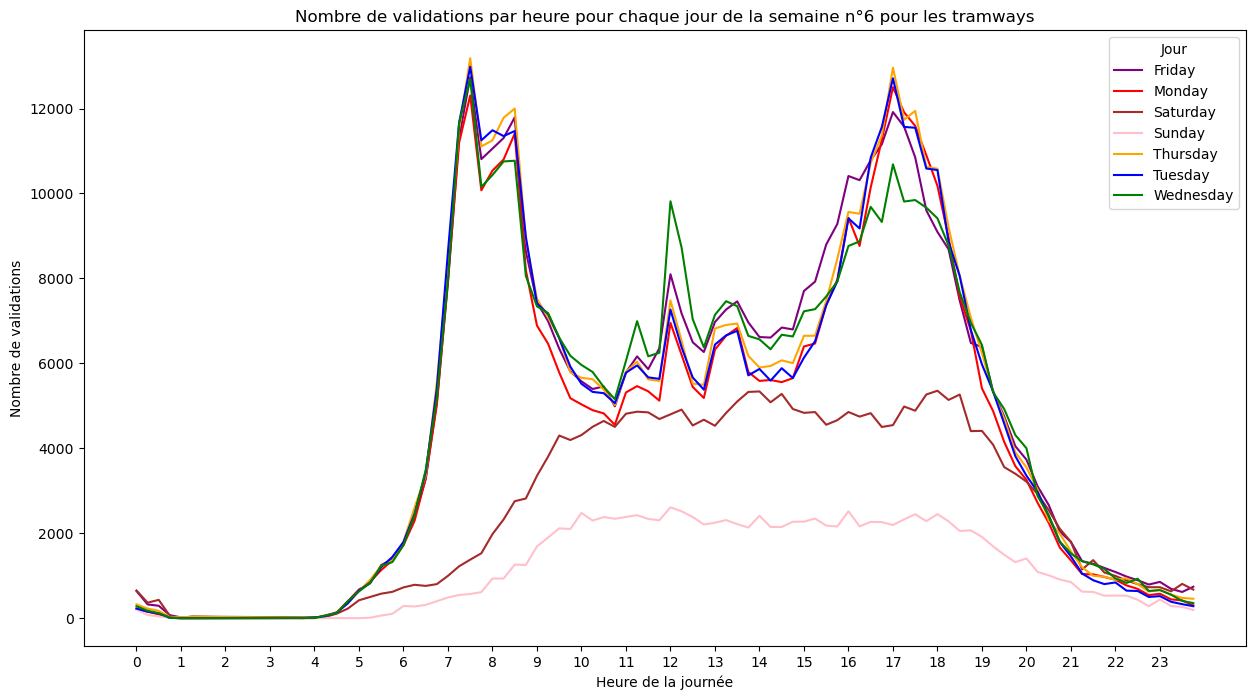

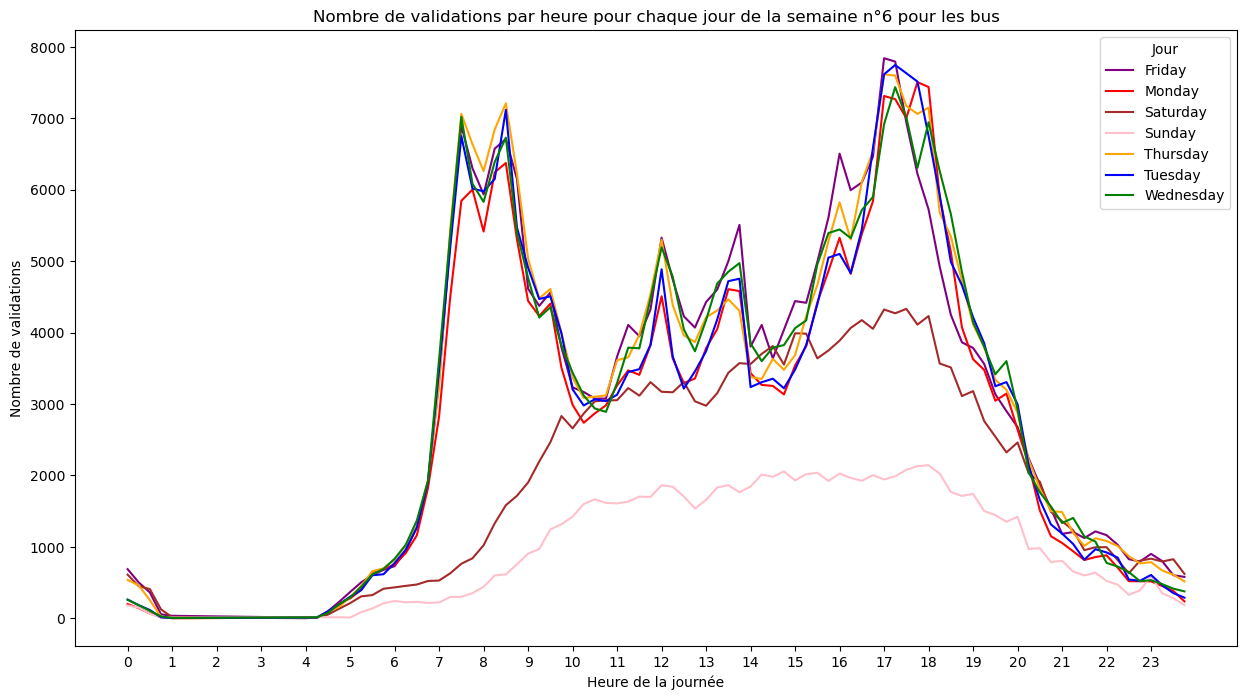

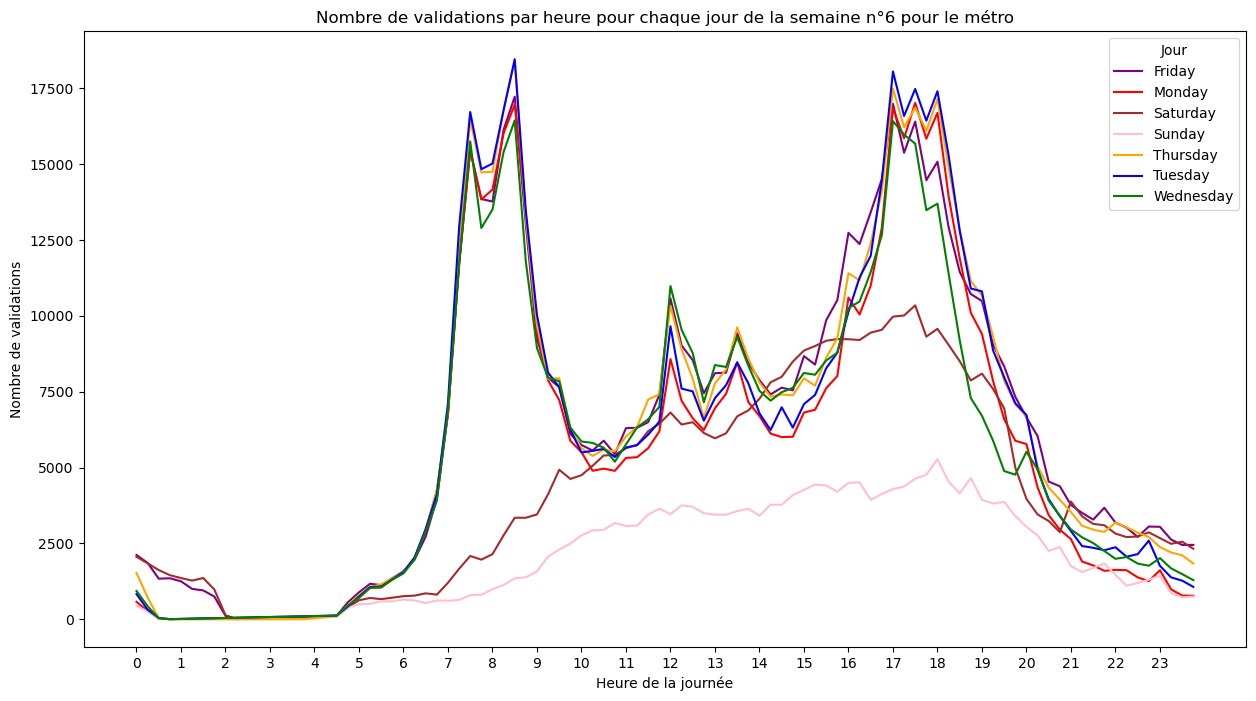

In [8]:
pf.plot_week_data(df_bus, df_tramway, df_subway, week_nbr=6, color=True, superpose=True)

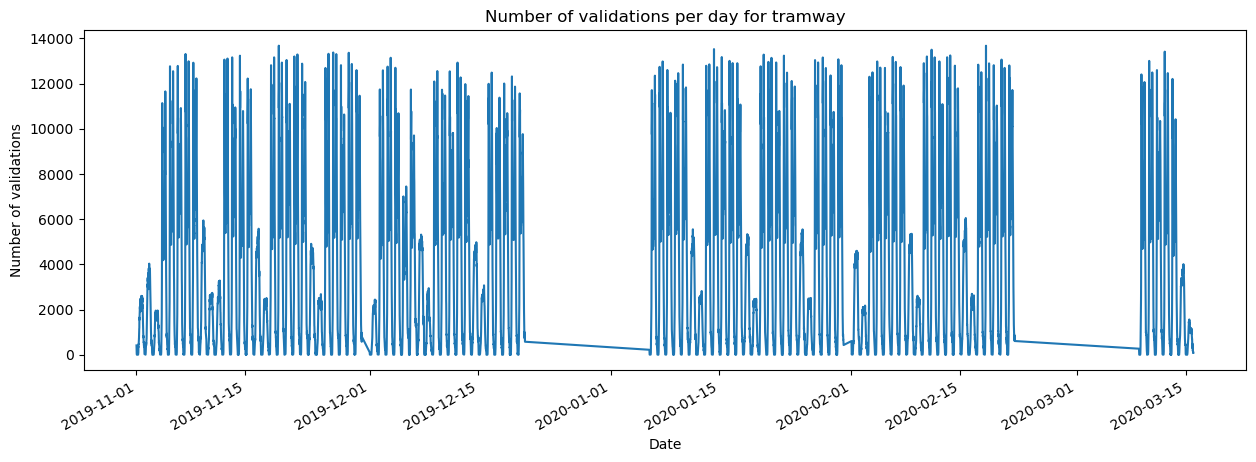

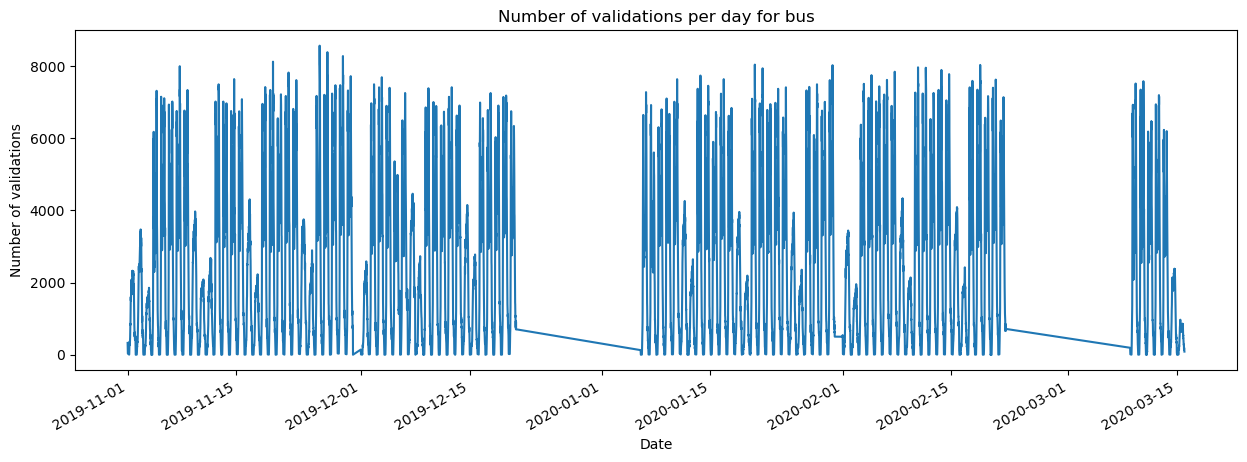

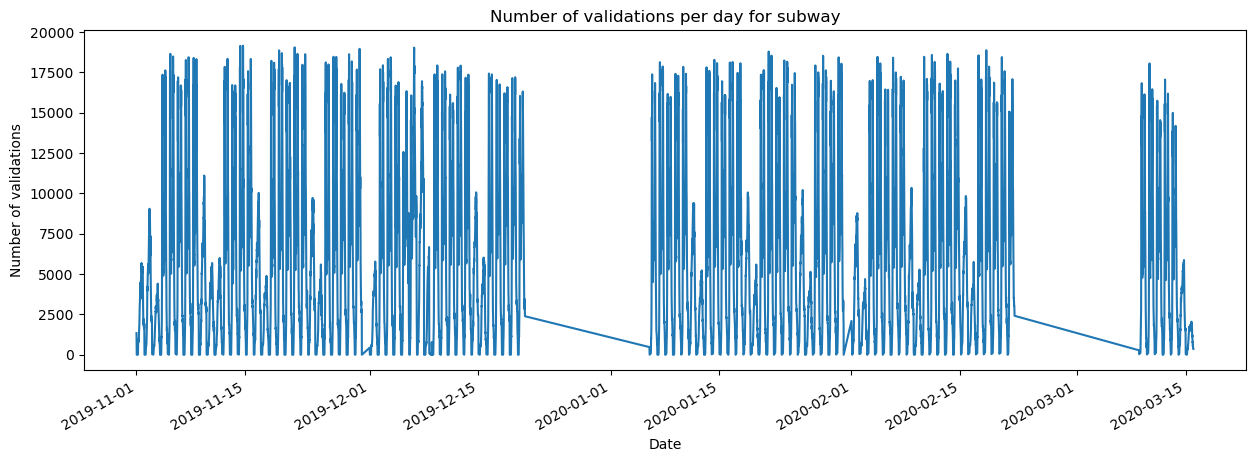

In [9]:
pf.plot_validations(df_bus_no_holiday, df_tramway_no_holiday, df_subway_no_holiday)

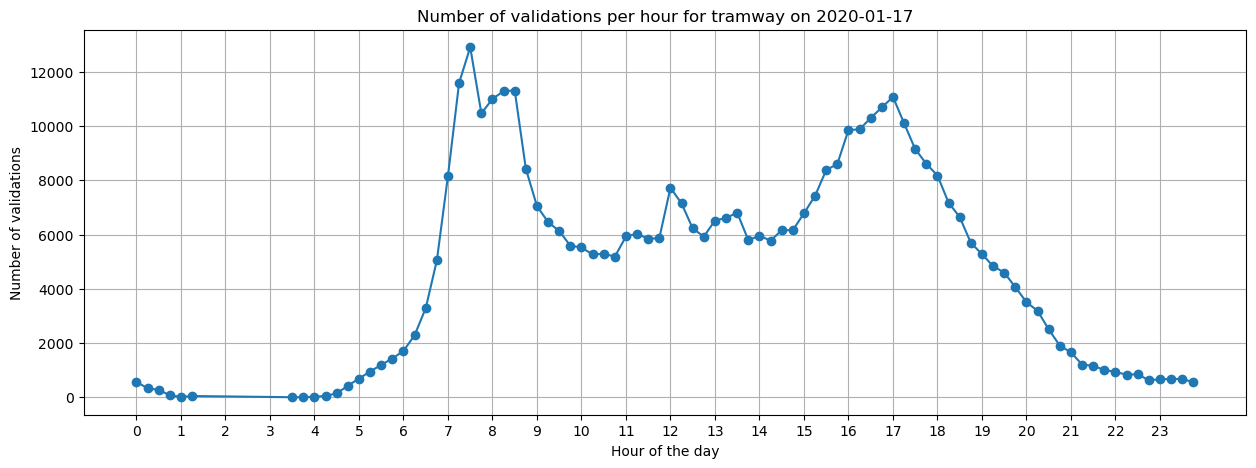

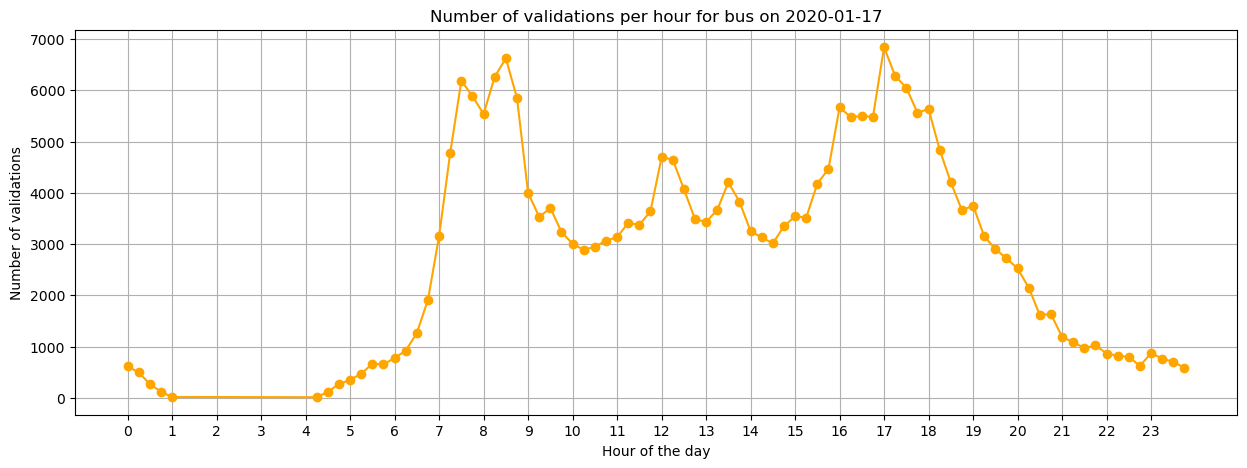

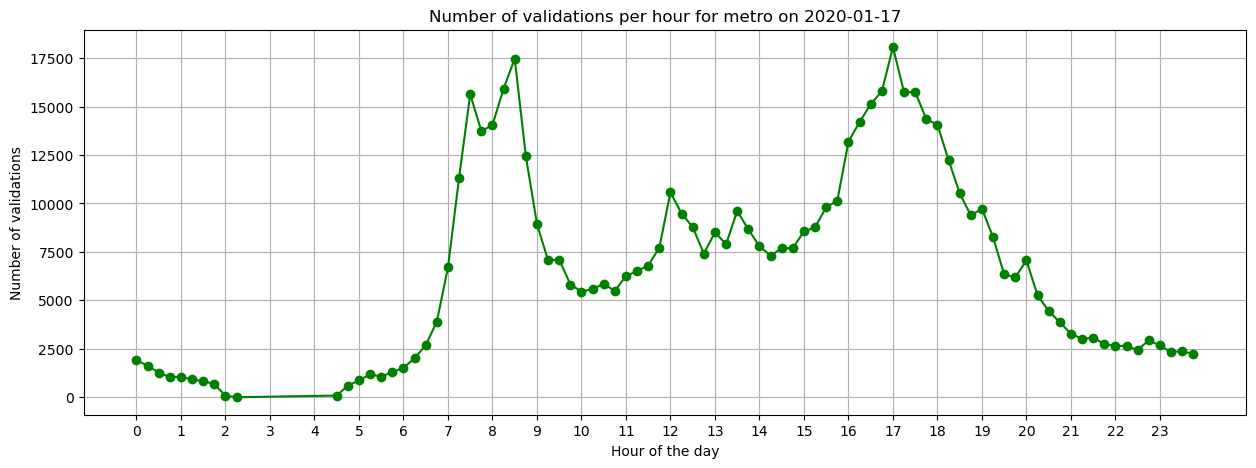

In [10]:
pf.plot_day_data(df_bus, df_tramway, df_subway, date_str='2020-01-17')

In [11]:
df_global = pf.merge_dataframes(df_bus, df_tramway, df_subway)
df_global.head()

,VAL_DATE,date,date_only,Flow,Transport_Type
0,2019-11-01 12:15:00,2019-11-01 12:15:00,2019-11-01,1.0,Bus
1,2019-11-02 10:30:00,2019-11-02 10:30:00,2019-11-02,1.0,Bus
2,2019-11-02 12:00:00,2019-11-02 12:00:00,2019-11-02,1.0,Bus
3,2019-11-04 08:00:00,2019-11-04 08:00:00,2019-11-04,1.0,Bus
4,2019-11-04 08:15:00,2019-11-04 08:15:00,2019-11-04,1.0,Bus


In [12]:
df_global = pf.give_time_period(df_global)
df_global.head()

,VAL_DATE,date,date_only,Flow,Transport_Type,Time_Period
0,2019-11-01 12:15:00,2019-11-01 12:15:00,2019-11-01,1.0,Bus,Semaine classique
1,2019-11-02 10:30:00,2019-11-02 10:30:00,2019-11-02,1.0,Bus,Semaine classique
2,2019-11-02 12:00:00,2019-11-02 12:00:00,2019-11-02,1.0,Bus,Semaine classique
3,2019-11-04 08:00:00,2019-11-04 08:00:00,2019-11-04,1.0,Bus,Semaine classique
4,2019-11-04 08:15:00,2019-11-04 08:15:00,2019-11-04,1.0,Bus,Semaine classique


In [13]:
df_global["Time_Period"].value_counts()

Time_Period
Semaine classique    10547136
Vacances d'hiver      1422686
Vacances de Noel      1118172
Période COVID          392398
Fête des Lumières      350975
Name: count, dtype: int64

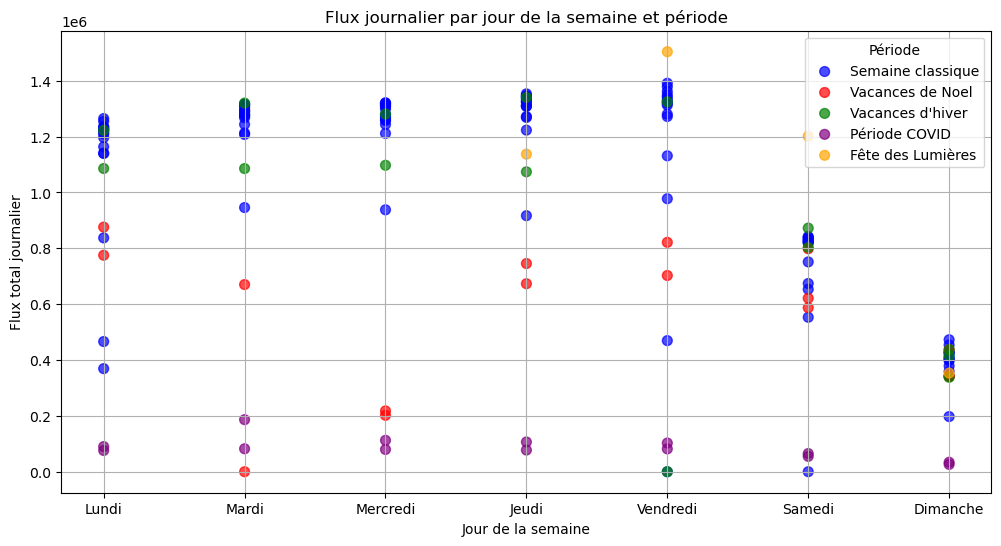

In [14]:
pf.plot_day_variation(df_global)

Date des grèves selon l'IA
| Date/Periode          | Contexte                          | Perturbations principales                                                                 | Efficacité du réseau (métro/tram) | Efficacité du réseau (bus)         |
|----------------------|-----------------------------------|-------------------------------------------------------------------------------------------|-----------------------------------|------------------------------------|
| 5 décembre 2019      | Grève nationale (retraites)       | Fréquence allégée sur certaines lignes de bus                                             | Quasi normale                     | Perturbé (lignes spécifiques)      |
| 17 décembre 2019     | Grève nationale (retraites)       | Très peu d’impact                                                                         | Normale                            | Normale                            |
| 9-10 décembre 2019   | Grève nationale (retraites)       | Aucune perturbation annoncée                                                              | Normale                            | Normale                            |
| Décembre 2019 - mars 2020 | Grèves ponctuelles         | Perturbations limitées, surtout sur les bus, annoncées à l’avance                         | Quasi normale                     | Ponctuellement perturbé           |

c:\Users\maxde\anaconda3\envs\DSPAP\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


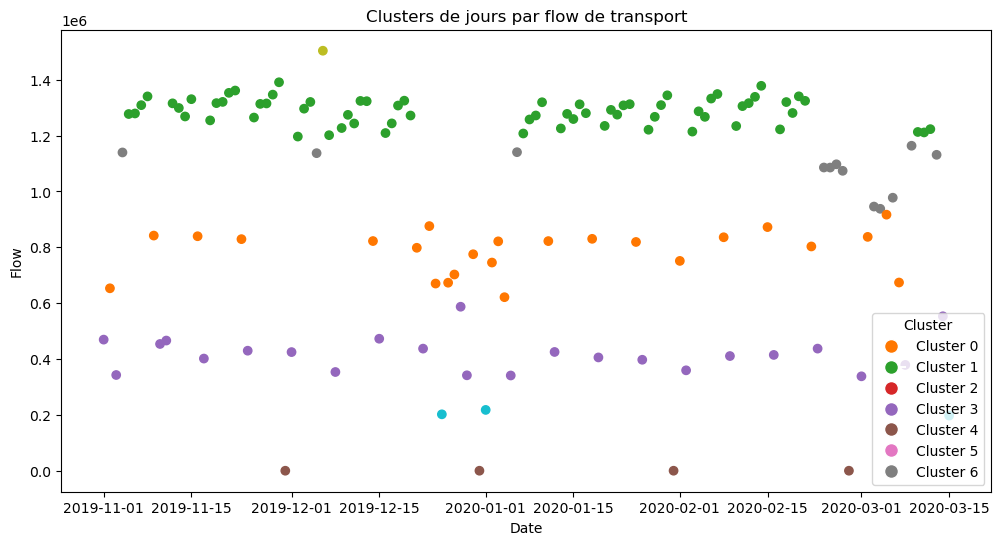

In [17]:
cluster_colors = ['#1f77b4', "#ff7700", '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
date_debut_covid = pd.to_datetime('2020-03-16').date()
df_cluster = pf.cluster_kmeans_days(df_global, n_clusters=7, date_limit=date_debut_covid)
pf.plot_cluster(df_cluster, cluster_color=cluster_colors[1:])

c:\Users\maxde\Desktop\Cours\ENTPE 3e année\Data Science\DSPAP\Project data\PT\DSPAP-Project-2025-ARNAUD-DELPLANQUE-GASTARD\notebooks\..\src\plot_functions.py:315: UserWarning: The palette list has more values (9) than needed (7), which may not be intended.
  sns.countplot(


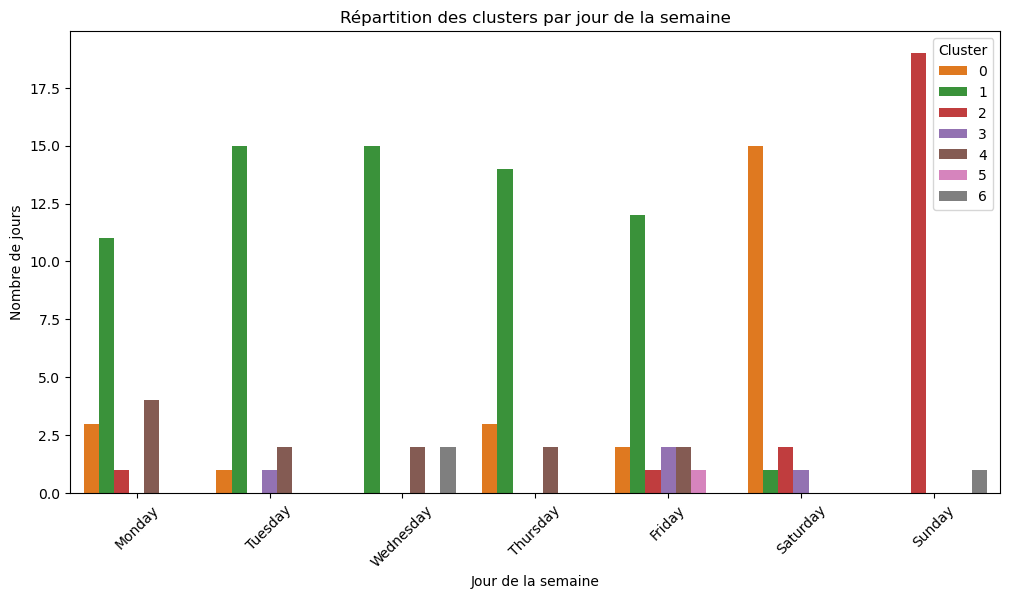

In [ ]:
pf.plot_cluster_distribution(df_cluster, cluster_color=cluster_colors[1:])

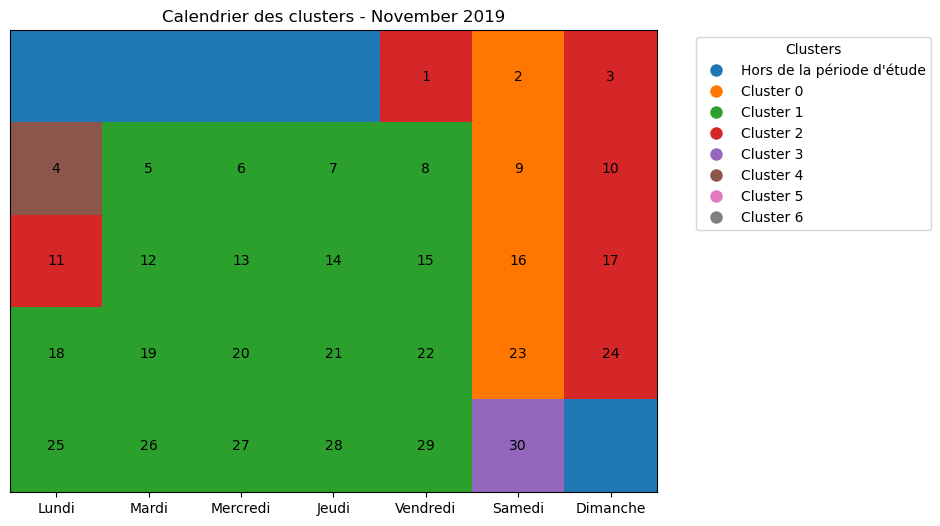

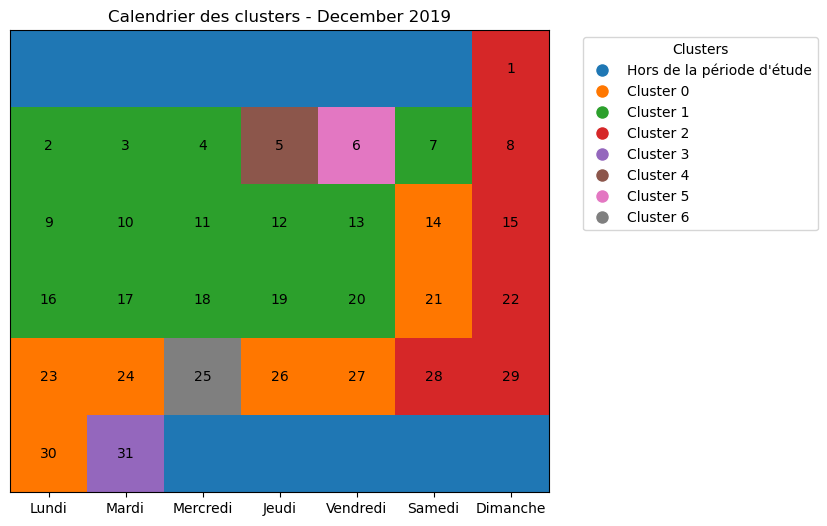

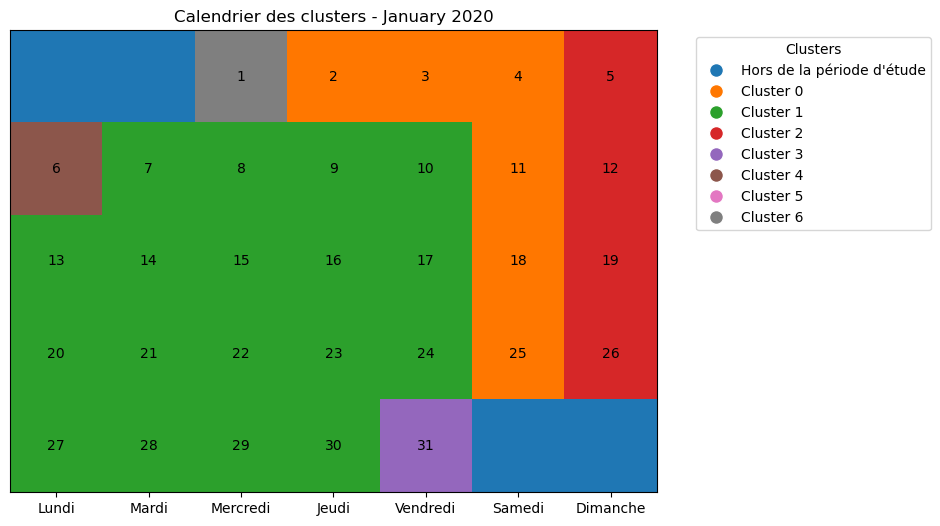

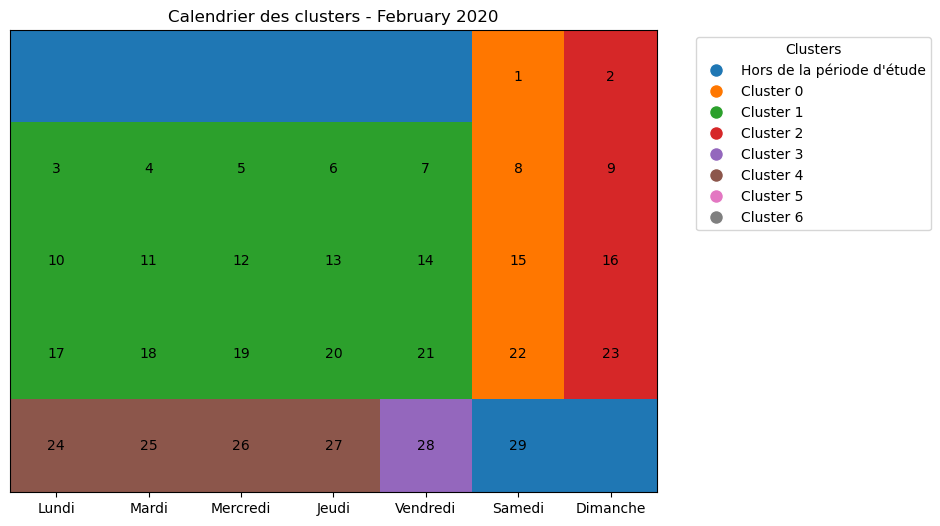

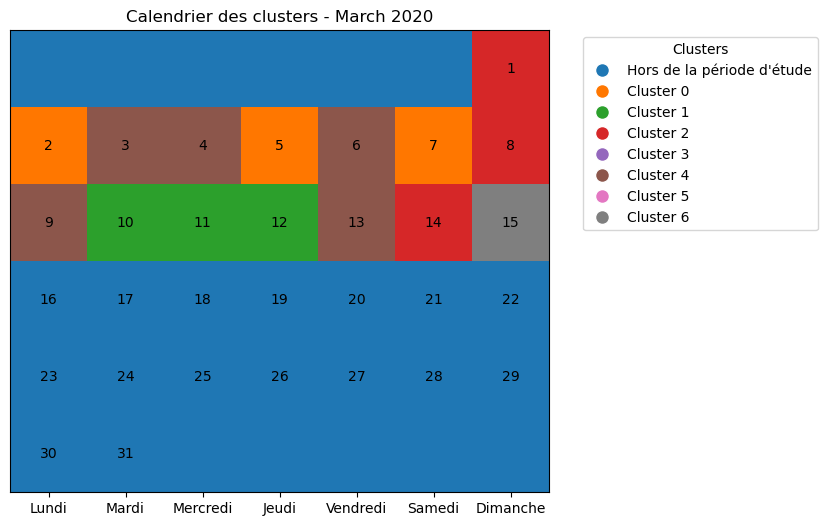

In [ ]:
pf.plot_cluster_calendar(df_cluster, year=2019, month=11, cluster_col='cluster', cluster_colors=cluster_colors)
pf.plot_cluster_calendar(df_cluster, year=2019, month=12, cluster_col='cluster', cluster_colors=cluster_colors)
pf.plot_cluster_calendar(df_cluster, year=2020, month=1, cluster_col='cluster', cluster_colors=cluster_colors)
pf.plot_cluster_calendar(df_cluster, year=2020, month=2, cluster_col='cluster', cluster_colors=cluster_colors)
pf.plot_cluster_calendar(df_cluster, year=2020, month=3, cluster_col='cluster', cluster_colors=cluster_colors)

In [ ]:
# Point de sauvegarde de df_cluster et df_global
# df_global.to_csv("df_global.csv", index=False)
# df_cluster.to_csv("df_cluster.csv", index=False)

             date_only       Flow  flow_normalized  cluster  year  month
date_only                                                               
2019-11-01  2019-11-01   469515.0        -1.269773        2  2019     11
2019-11-02  2019-11-02   653337.0        -0.804334        0  2019     11
2019-11-03  2019-11-03   342813.0        -1.590584        2  2019     11
2019-11-04  2019-11-04  1139771.0         0.427321        4  2019     11
2019-11-05  2019-11-05  1277443.0         0.775908        1  2019     11
1 2019-11-01 True
2 2019-11-02 True
3 2019-11-03 True
4 2019-11-04 True
5 2019-11-05 True
6 2019-11-06 True
7 2019-11-07 True
8 2019-11-08 True
9 2019-11-09 True
10 2019-11-10 True
11 2019-11-11 True
12 2019-11-12 True
13 2019-11-13 True
14 2019-11-14 True
15 2019-11-15 True
16 2019-11-16 True
17 2019-11-17 True
18 2019-11-18 True
19 2019-11-19 True
20 2019-11-20 True
21 2019-11-21 True
22 2019-11-22 True
23 2019-11-23 True
24 2019-11-24 True
25 2019-11-25 True
26 2019-11-26 True
27 2

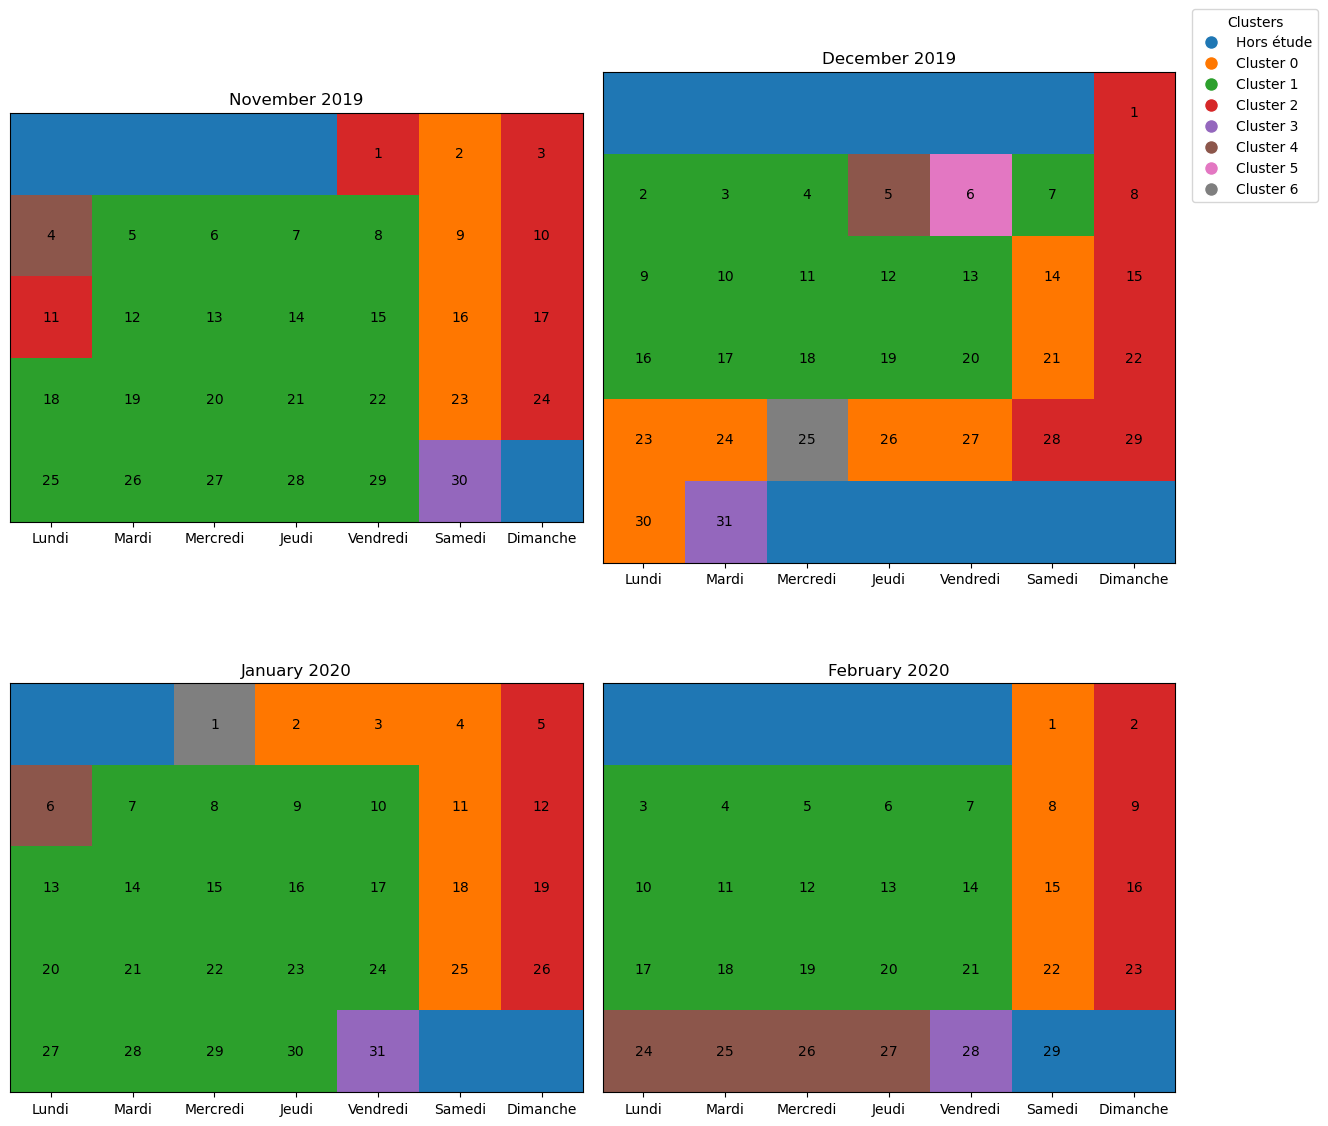

In [ ]:
pf.plot_cluster_calendars_as_subplots(df_cluster, start_year=2019, start_month=11, end_year=2020, end_month=2, cluster_colors=cluster_colors)

In [ ]:
df_cluster.cluster.value_counts().sort_index()[0]

AttributeError: 'numpy.int64' object has no attribute 'float'

## **Création de journées type par cluster**

In [ ]:
# Création de journées types par cluster

df_clustered_days = pf.create_typical_days_per_cluster(df_global, df_cluster, cluster_col='cluster')
df_clustered_days.head()

,time_str,cluster,Flow
0,00:00,0.0,10.004938
1,00:00,1.0,10.090934
2,00:00,2.0,6.820723
3,00:00,3.0,1.333333
4,00:00,4.0,8.349124


In [18]:
df = pd.merge(df_global, df_cluster[['date_only', 'cluster']], on='date_only', how='left')

In [19]:
df

,VAL_DATE,date,date_only,Flow,Transport_Type,Time_Period,cluster
0,2019-11-01 12:15:00,2019-11-01 12:15:00,2019-11-01,1.0,Bus,Semaine classique,2.0
1,2019-11-02 10:30:00,2019-11-02 10:30:00,2019-11-02,1.0,Bus,Semaine classique,0.0
2,2019-11-02 12:00:00,2019-11-02 12:00:00,2019-11-02,1.0,Bus,Semaine classique,0.0
3,2019-11-04 08:00:00,2019-11-04 08:00:00,2019-11-04,1.0,Bus,Semaine classique,4.0
4,2019-11-04 08:15:00,2019-11-04 08:15:00,2019-11-04,1.0,Bus,Semaine classique,4.0
...,...,...,...,...,...,...,...
13831362,2020-03-30 22:15:00,2020-03-30 22:15:00,2020-03-30,111.0,Subway,Période COVID,NaN
13831363,2020-03-30 22:30:00,2020-03-30 22:30:00,2020-03-30,94.0,Subway,Période COVID,NaN
13831364,2020-03-30 22:45:00,2020-03-30 22:45:00,2020-03-30,84.0,Subway,Période COVID,NaN
13831365,2020-03-30 23:00:00,2020-03-30 23:00:00,2020-03-30,52.0,Subway,Période COVID,NaN


In [ ]:
df_cluster

,date_only,Flow,flow_normalized,cluster
0,2019-11-01,469515.0,-1.269773,2
1,2019-11-02,653337.0,-0.804334,0
2,2019-11-03,342813.0,-1.590584,2
3,2019-11-04,1139771.0,0.427321,4
4,2019-11-05,1277443.0,0.775908,1
...,...,...,...,...
130,2020-03-11,1211483.0,0.608896,1
131,2020-03-12,1223322.0,0.638873,1
132,2020-03-13,1131359.0,0.406022,4
133,2020-03-14,553090.0,-1.058161,2
